In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/MOMO Step 2/MoMo Talent 2024_DA_Case Study Round_Questions - Copy - Copy - Copy.xlsx'

In [4]:
def parse_date(date_str):
    for fmt in ("%Y-%m-%d", "%d/%m/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"No valid date format found for {date_str}")

In [5]:
Transactions_df = pd.read_excel(file_path, sheet_name='Data Transactions')
Transactions_df['Amount'] = Transactions_df['Amount'].str.replace(',', '').astype(int)
Transactions_df['Date'] = Transactions_df['Date'].apply(parse_date)

In [6]:
Commission_df = pd.read_excel(file_path, sheet_name='Data Commission')

In [7]:
def replace_year(year):
    if int(year) > 2024:
        return '2030'
    else:
        return year

In [8]:
UserInfo_df = pd.read_excel(file_path, sheet_name='Data User_Info')
UserInfo_df[['Year', 'Month', 'Day']] = pd.DataFrame(UserInfo_df['First_tran_date'].str.split(r'[-/]', expand=True))
UserInfo_df['Year'] = UserInfo_df['Year'].apply(lambda x: replace_year(x))
UserInfo_df[['Year', 'Month', 'Day']] = UserInfo_df[['Year', 'Month', 'Day']].astype(int)
UserInfo_df['First_tran_date'] = pd.to_datetime(UserInfo_df[['Year', 'Month', 'Day']])
UserInfo_df.drop(columns=['Year', 'Month', 'Day'], inplace=True)
UserInfo_df['Location'] = UserInfo_df['Location'].replace('Ho Chi Minh City', 'HCMC')
UserInfo_df['Location'] = UserInfo_df['Location'].replace('Other', 'Other Cities')
replacement_map = {'FEMALE': 'Nữ','female': 'Nữ','f': 'Nữ', 'MALE': 'Nam', 'male': 'Nam', 'M': 'Nam'}
UserInfo_df['Gender'] = UserInfo_df['Gender'].replace(replacement_map)
UserInfo_df.drop_duplicates(subset=['User_id'], keep='first', inplace=True)

In [9]:
UserInfo_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13390 entries, 0 to 13427
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User_id          13390 non-null  int64         
 1   First_tran_date  13390 non-null  datetime64[ns]
 2   Location         13390 non-null  object        
 3   Age              13390 non-null  object        
 4   Gender           13390 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 627.7+ KB


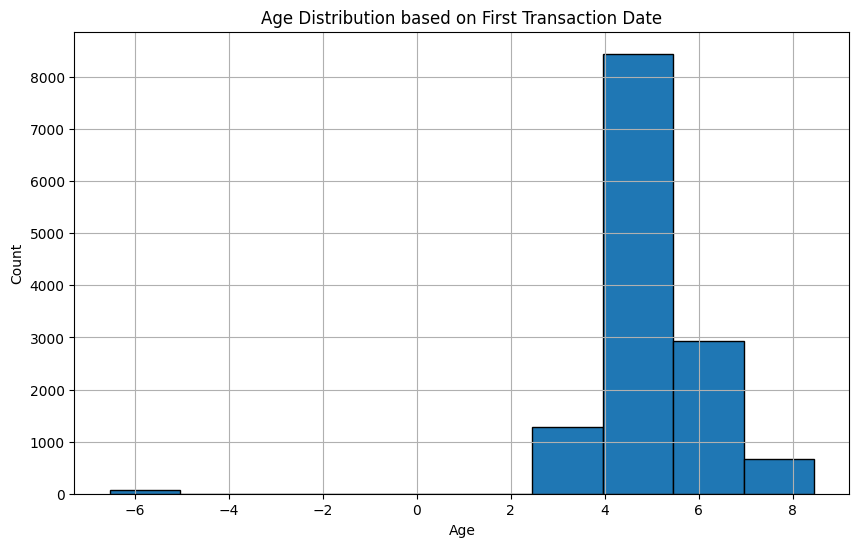

In [10]:
current_date = datetime.now()
plt.figure(figsize=(10, 6))
UserInfo_df['Age_at_first_transaction'] = UserInfo_df['First_tran_date'].apply(lambda x: (current_date - x).days / 365.25)
plt.hist(UserInfo_df['Age_at_first_transaction'], bins=10, edgecolor='black')
plt.title('Age Distribution based on First Transaction Date')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [11]:
merged_df = pd.merge(Transactions_df,Commission_df, on='Merchant_id', how='left')

# Tính toán doanh thu (Revenue)
Transactions_df['Revenue'] = merged_df['Amount'] * (1-merged_df['Rate_pct']*0.01)

In [12]:
Transactions_df['Month'] = Transactions_df['Date'].dt.month
Transactions_df['Day_of_week'] = Transactions_df['Date'].dt.day_name()

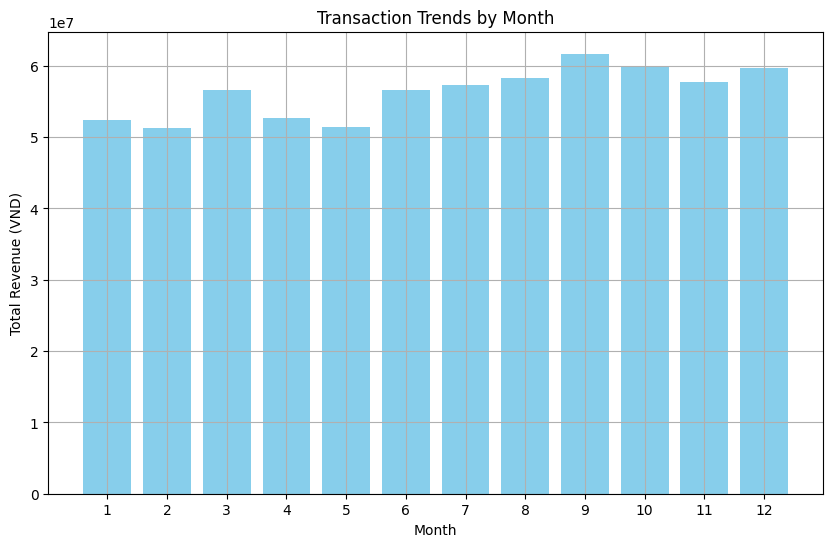

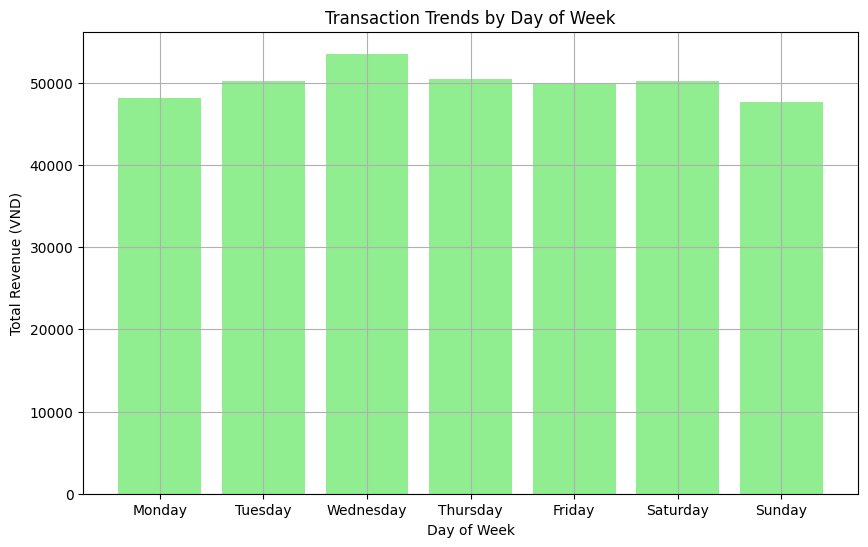

In [13]:
# Tạo plot cho xu hướng giao dịch theo tháng
plt.figure(figsize=(10, 6))
monthly_data = Transactions_df.groupby('Month')['Revenue'].sum()
plt.bar(monthly_data.index, monthly_data.values, color='skyblue')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Total Revenue (VND)')
plt.title('Transaction Trends by Month')
plt.grid(True)
plt.show()

# Tạo plot cho xu hướng giao dịch theo ngày trong tuần
plt.figure(figsize=(10, 6))
weekly_data = Transactions_df.groupby('Day_of_week')['Revenue'].mean()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data = weekly_data.reindex(days_of_week)
plt.bar(weekly_data.index, weekly_data.values, color='lightgreen')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (VND)')
plt.title('Transaction Trends by Day of Week')
plt.grid(True)
plt.show()

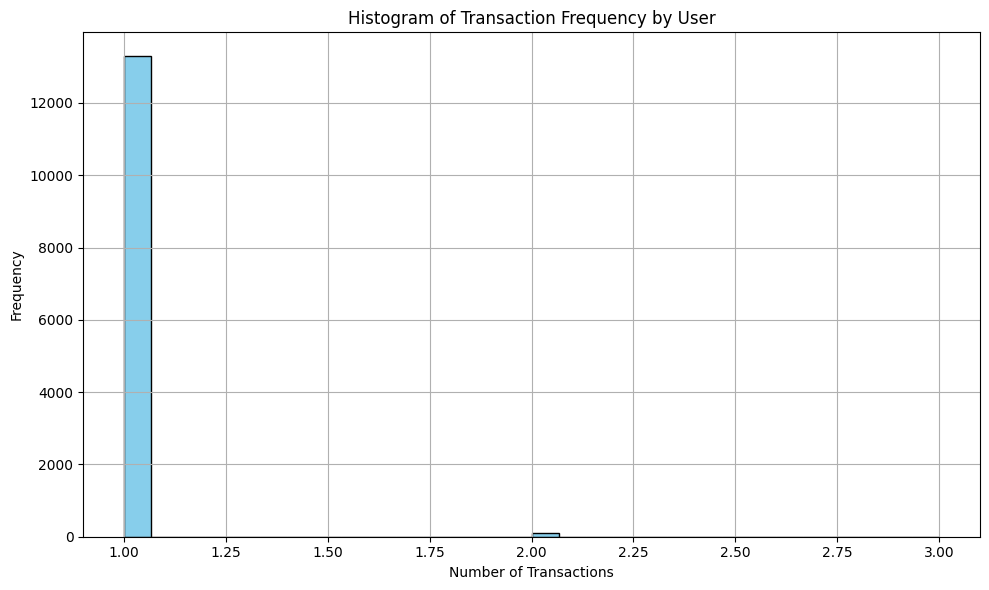

In [14]:
transaction_frequency = Transactions_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(transaction_frequency, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Frequency by User')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

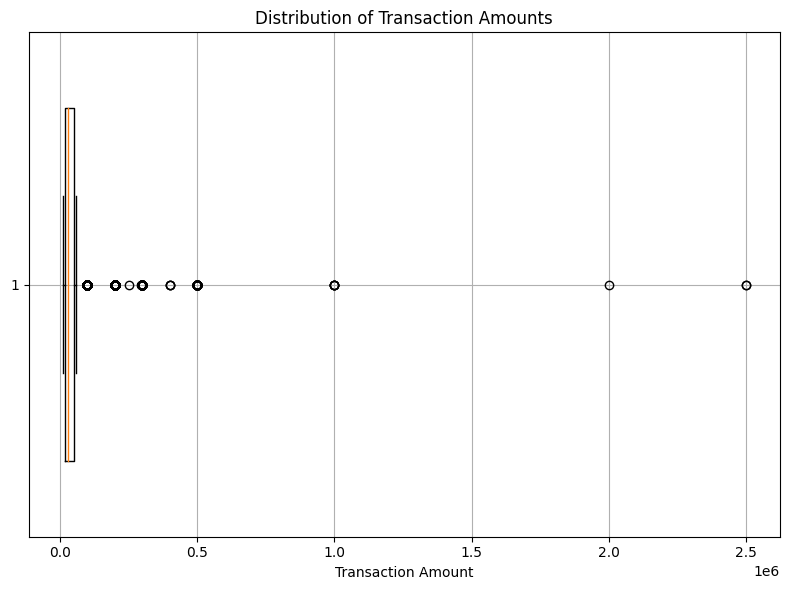

In [15]:

plt.figure(figsize=(8, 6))
plt.boxplot(Transactions_df['Amount'], vert=False, widths=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

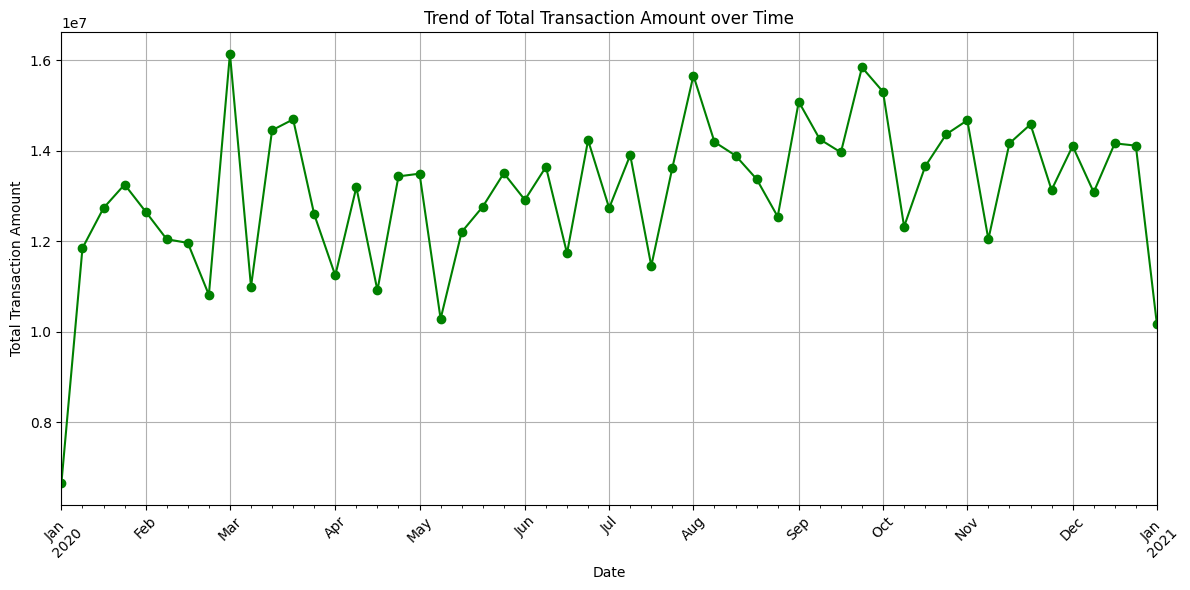

In [16]:
weekly_total_amount = Transactions_df.resample('W', on='Date')['Amount'].sum()

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
weekly_total_amount.plot(kind='line', marker='o', color='green')
plt.title('Trend of Total Transaction Amount over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

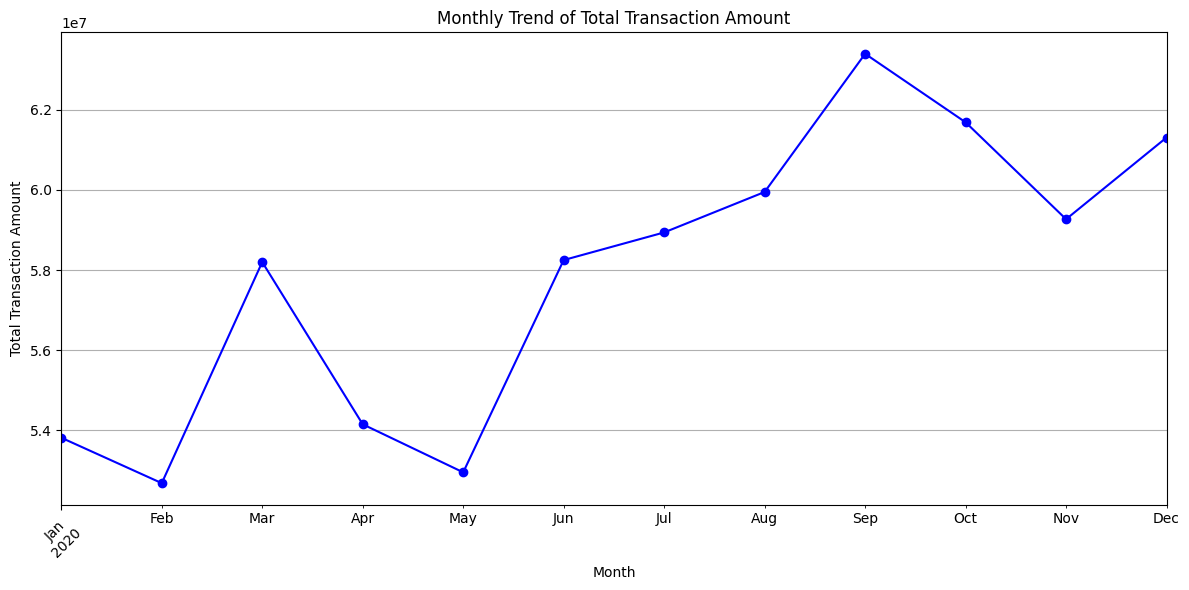

In [17]:
# Tổng hợp theo tháng và tính tổng số tiền giao dịch
monthly_total_amount = Transactions_df.resample('M', on='Date')['Amount'].sum()

# Vẽ biểu đồ đường cho tổng số tiền giao dịch hàng tháng
plt.figure(figsize=(12, 6))
monthly_total_amount.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend of Total Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


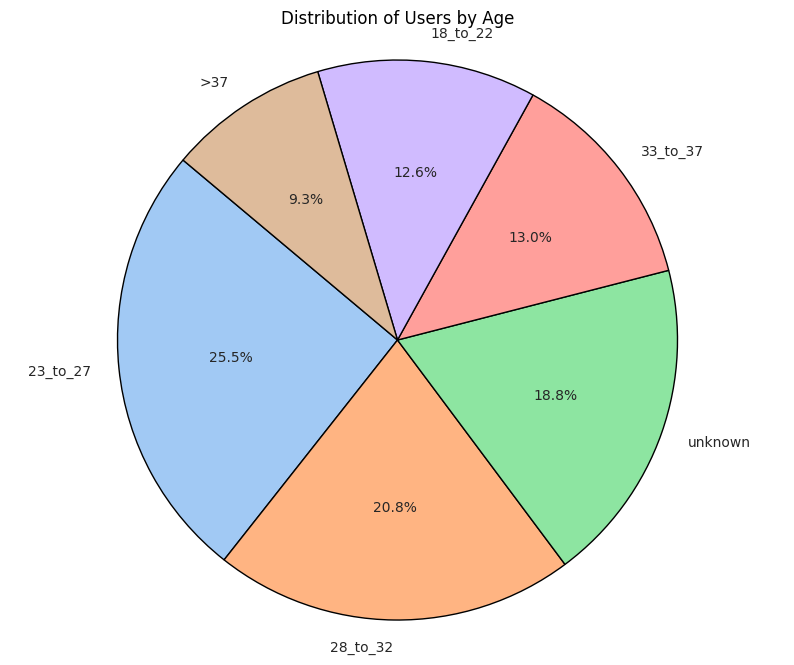

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Age_counts = UserInfo_df['Age'].value_counts()
# Biểu đồ phân phối độ tuổi
plt.figure(figsize=(10, 8))
plt.title('Distribution of Users by Age')
sns.set_style('whitegrid')
plt.pie(Age_counts.values, labels=Age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


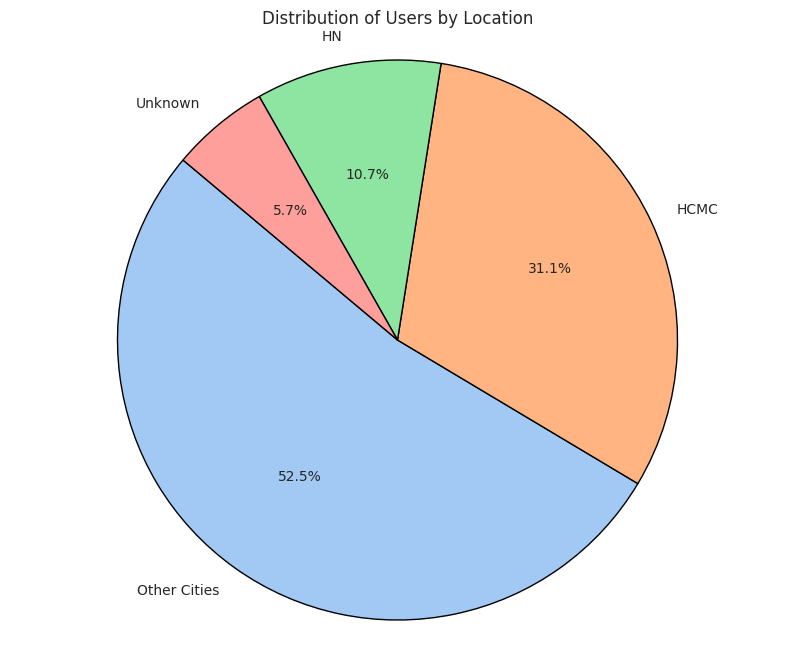

In [19]:
# Đếm số lượng mẫu trong mỗi nhóm 'Location'
location_counts = UserInfo_df['Location'].value_counts()

# Vẽ biểu đồ pie
plt.figure(figsize=(10, 8))
plt.title('Distribution of Users by Location')
sns.set_style('whitegrid')
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()



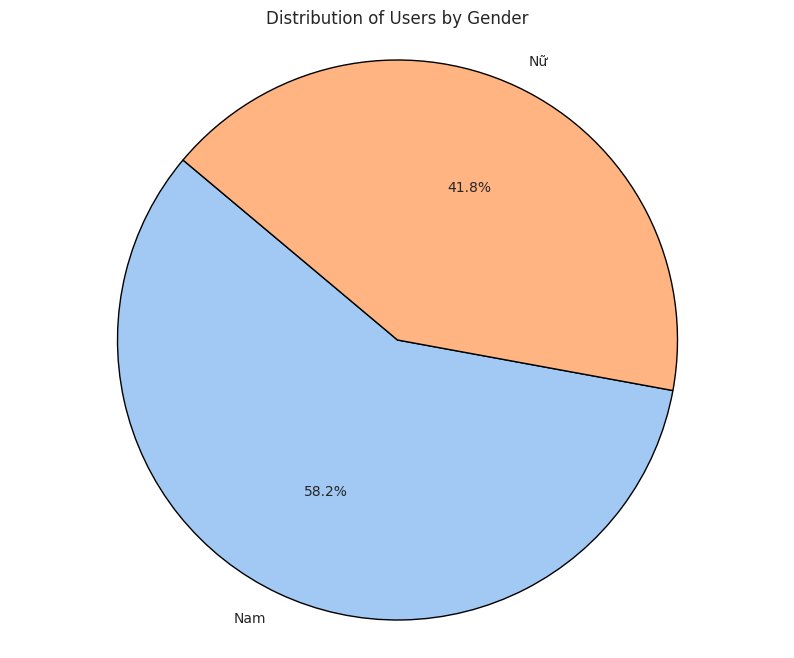

In [20]:
# Đếm số lượng mẫu trong mỗi nhóm 'Gender'
location_counts = UserInfo_df['Gender'].value_counts()

# Vẽ biểu đồ pie
plt.figure(figsize=(10, 8))
plt.title('Distribution of Users by Gender')
sns.set_style('whitegrid')
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

<ipython-input-21-774be8fe7168>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Revenue', y='Age', data=merged_df, estimator=np.sum, ci=None, palette='viridis', orient='h')
<ipython-input-21-774be8fe7168>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Age', data=merged_df, estimator=np.sum, ci=None, palette='viridis', orient='h')


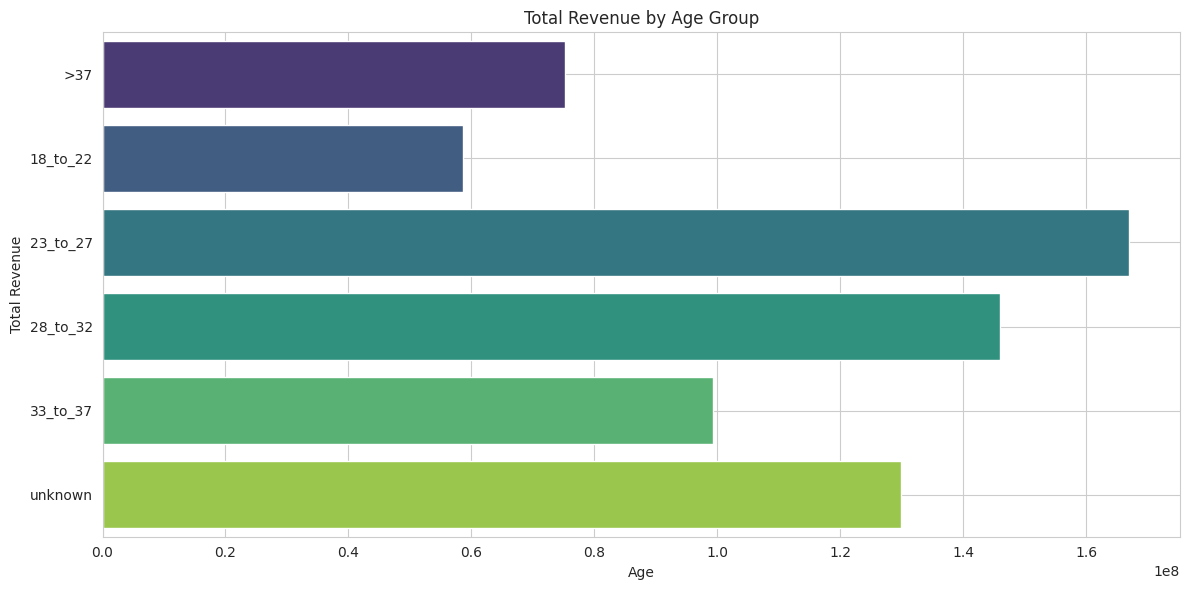

In [21]:
merged_df = pd.merge(Transactions_df, UserInfo_df, left_on='user_id', right_on='User_id', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue', y='Age', data=merged_df, estimator=np.sum, ci=None, palette='viridis', orient='h')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-22-71b4e79c5cd4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')
<ipython-input-22-71b4e79c5cd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')


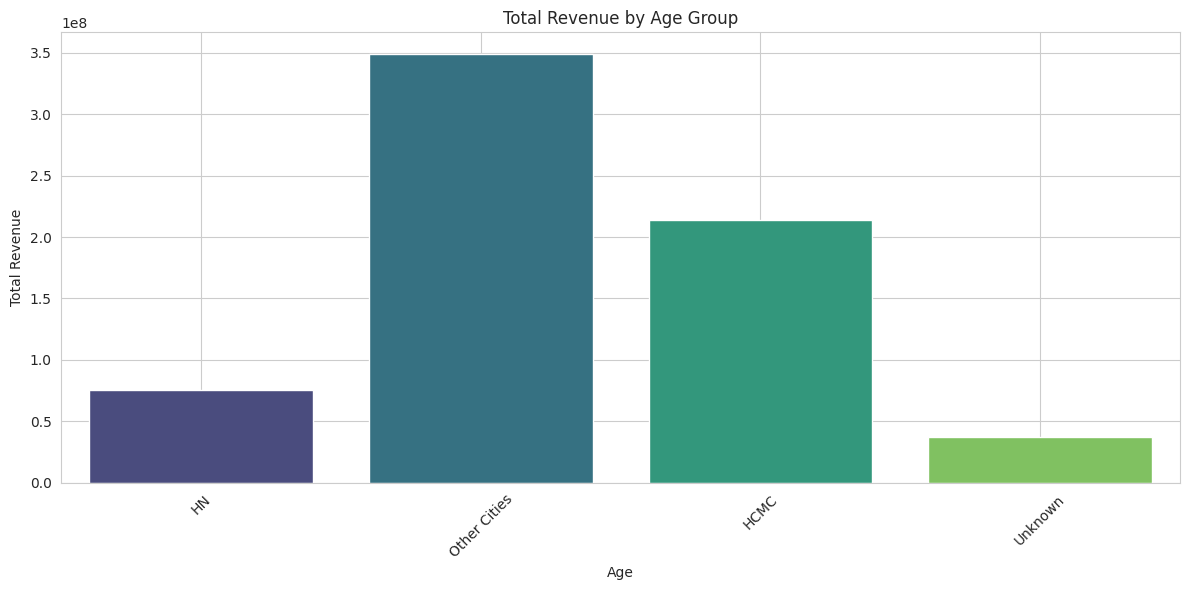

In [22]:
merged_df = pd.merge(Transactions_df, UserInfo_df, left_on='user_id', right_on='User_id', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-23-34b0fcae4e7e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')
<ipython-input-23-34b0fcae4e7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')


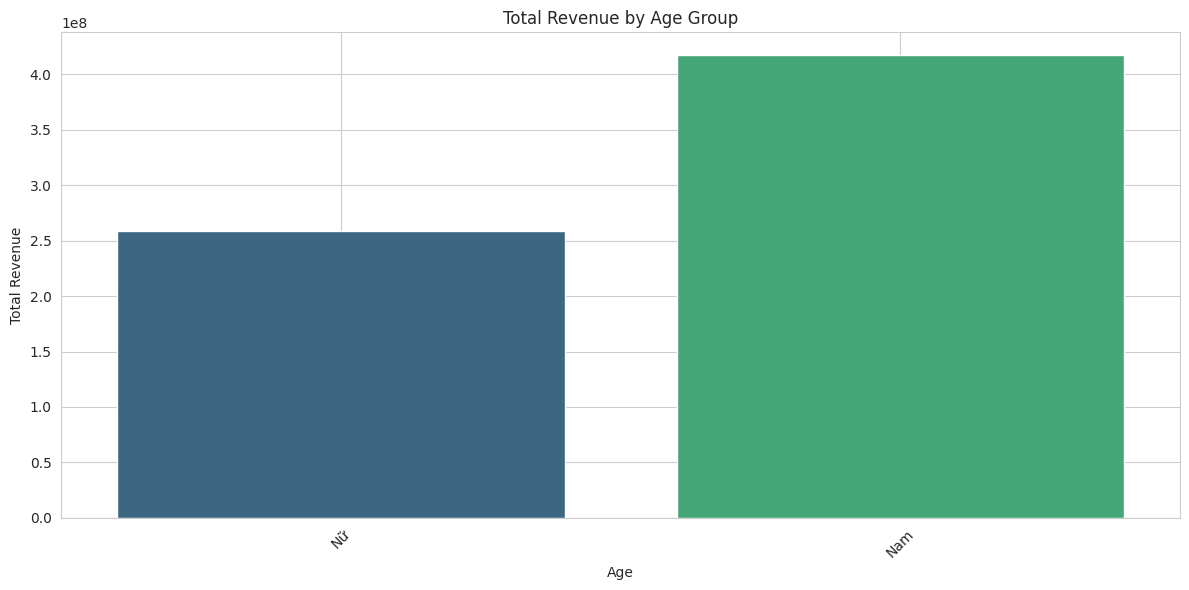

In [23]:
merged_df = pd.merge(Transactions_df, UserInfo_df, left_on='user_id', right_on='User_id', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Revenue', data=merged_df, estimator=np.sum, ci=None, palette='viridis')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
Commission_df.head()

,Merchant_name,Merchant_id,Rate_pct,% cashback (current),% cashback (proposal)
0,Viettel,12,2,1,2.0
1,Mobifone,13,3,1,2.5
2,Vinaphone,14,4,1,3.0
3,Vietnamobile,15,4,1,3.0
4,Gmobile,16,4,1,3.0


In [25]:
Commission_df['% cashback (current)'] = [1, 1, 1, 1, 1]
Commission_df['% cashback (proposal)'] = [2, 2.5, 3, 3, 3]

In [30]:
Commission_df['Revenue_deduction'] =Commission_df['% cashback (proposal)'] -Commission_df['% cashback (current)']
Commission_df.head()

,Merchant_name,Merchant_id,Rate_pct,% cashback (current),% cashback (proposal),Revenue_deduction
0,Viettel,12,2,1,2.0,1.0
1,Mobifone,13,3,1,2.5,1.5
2,Vinaphone,14,4,1,3.0,2.0
3,Vietnamobile,15,4,1,3.0,2.0
4,Gmobile,16,4,1,3.0,2.0


In [31]:
Commission_df['rate pct remaining'] = 	Commission_df['Rate_pct'] -Commission_df['% cashback (proposal)']

In [32]:
Commission_df.head()

,Merchant_name,Merchant_id,Rate_pct,% cashback (current),% cashback (proposal),Revenue_deduction,rate pct remaining
0,Viettel,12,2,1,2.0,1.0,0.0
1,Mobifone,13,3,1,2.5,1.5,0.5
2,Vinaphone,14,4,1,3.0,2.0,1.0
3,Vietnamobile,15,4,1,3.0,2.0,1.0
4,Gmobile,16,4,1,3.0,2.0,1.0


In [35]:
combined_data = pd.merge(Transactions_df, Commission_df, on='Merchant_id', how='left')
Transactions_df['Profit_before_cashback'] = combined_data['Amount'] * (combined_data['Rate_pct'] - combined_data['% cashback (current)']) / 100
Transactions_df['Profit_after_cashback'] = combined_data['Amount'] * combined_data['rate pct remaining'] / 100

In [36]:
total_profit_before = Transactions_df['Profit_before_cashback'].sum()
total_profit_after = Transactions_df['Profit_after_cashback'].sum()

In [37]:
total_cashback_given = combined_data['Amount'] * combined_data['% cashback (proposal)'] / 100
total_cashback = total_cashback_given.sum()

In [41]:
# In kết quả tổng lợi nhuận trước và sau khi áp dụng hoàn tiền
print(f'Total profit before cashback: {total_profit_before}')
print(f'Total profit after cashback: {total_profit_after}')
print(f'Rate profit after cashback: {total_profit_after/total_profit_before:.2f}')
# In tổng số tiền đã trả lại cho khách hàng
print(f'Total cashback given: {total_cashback}')

Total profit before cashback: 11766684.68
Total profit after cashback: 2410321.17
Rate profit after cashback: 0.20
Total cashback given: 16302405.85


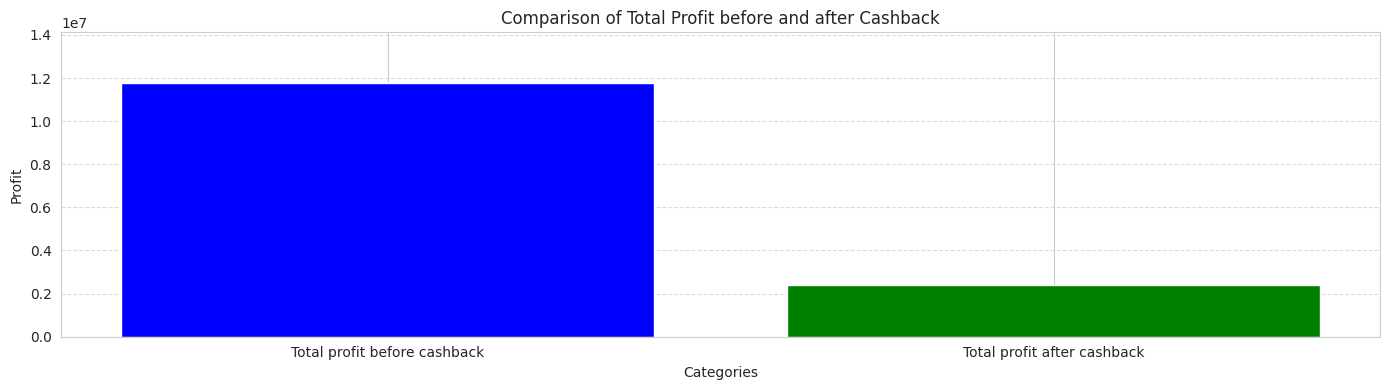

In [45]:
categories = ['Total profit before cashback', 'Total profit after cashback']
values = [11766684.68, 2410321.17]
plt.figure(figsize=(14, 4))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Categories')
plt.ylabel('Profit')
plt.title('Comparison of Total Profit before and after Cashback')
plt.ylim(0, max(values) * 1.2)  # Để biểu đồ cân đối và đẹp hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()